## Assignment 2 (Machine Learning using Sklearn and TensorFlow)
### Angel Team:

* Andres Salguero  - C0932873

* Andrea Franco - C0931897

* Vishv Patel - C0938107

* Rajkumar Patel - C0934637

* Harpreet kaur - C0936410

* Gurpreet kaur - C0936411


## Project: Traffic collision analysis 
This project aims at building a machine learning classification model in oder to predict whether the person just fatal or non fatal injury in a collision based on various features.the dataset used in this project is from Kaggle.

The classification models which are used in this project are evaluated on the basis of classification report and accuracy score to know which model is performing the best.

The classification models which will be used are Random Forest classifier, Gradient boosting Classifier, SVM amd logistic regression. Then the results from all these model are saved in csv file and then uploaded to competition to know whether the models are under-fitting or over-fitting.

## Dataset

### Killed or Seriously Injured (KSI) dataset

This dataset includes all traffic collisions events where a person was either Killed or Seriously Injured (KSI) from 2006 – 2022.

This Killed or Seriously Injured (KSI) dataset is a subset from all traffic collision events.

The source of the data comes from police reports where an officer attended an event related to a traffic collision. Please note that this dataset does not include all traffic collision events. The KSI data only includes events where a person sustained a major or fatal injury in a traffic collision event.

**Data Fields Description:**

* INDEX_ : Unique Identifier
* ACCNUM : Accident Number
* YEAR : Year Collision Occurred
* DATE : Date Collision Occurred (time is displayed in UTC format)
* TIME : Time Collision Occurred
* STREET1 : Street Collision Occurred
* STREET2 : Street Collision Occurred
* OFFSET : Distance and direction of the Collision
* ROAD_CLASS : Road Classification
* DISTRICT : City District
* WARDNUM : City of Toronto Ward collision occurred
* LATITUDE : Latitude
* LONGITUDE : Longitude
* LOCCOORD : Location Coordinate
* ACCLOC : Collision Location
* TRAFFCTL : Traffic Control Type
* VISIBILITY : Environment Condition
* LIGHT : Light Condition
* RDSFCOND : Road Surface Condition
* ACCLASS : Classification of Accident
* IMPACTYPE : Initial Impact Type
* INVTYPE : Involvement Type
* INVAGE : Age of Involved Party
* INJURY : Severity of Injury
* FATAL_NO : Sequential Number
* INITDIR : Initial Direction of Travel
* VEHTYPE : Type of Vehicle
* MANOEUVER : Vehicle Manoeuver
* DRIVACT : Apparent Driver Action
* DRIVCOND : Driver Condition
* PEDTYPE : Pedestrian Crash Type - detail
* PEDACT : Pedestrian Action
* PEDCOND : Condition of Pedestrian
* CYCLISTYPE : Cyclist Crash Type - detail
* CYCACT : Cyclist Action
* CYCCOND : Cyclist Condition
* PEDESTRIAN : Pedestrian Involved In Collision
* CYCLIST : Cyclists Involved in Collision
* AUTOMOBILE : Driver Involved in Collision
* MOTORCYCLE : Motorcyclist Involved in Collision
* TRUCK : Truck Driver Involved in Collision
* TRSN_CITY_VEH : Transit or City Vehicle Involved in Collision
* EMERG_VEH : Emergency Vehicle Involved in Collision
* PASSENGER : Passenger Involved in Collision
* SPEEDING : Speeding Related Collision
* AG_DRIV : Aggressive and Distracted Driving Collision
* REDLIGHT : Red Light Related Collision
* ALCOHOL : Alcohol Related Collision
* DISABILITY : Medical or Physical Disability Related Collision
* HOOD_158 Unique ID : for City of Toronto Neighbourhood (new)
* NEIGHBOURHOOD_158 : City of Toronto Neighbourhood name (new)
* HOOD_140 : Unique ID for City of Toronto Neighbourhood (old)
* NEIGHBOURHOOD_140 : City of Toronto Neighbourhood name (old)
* DIVISION : Toronto Police Service Division
* ObjectID : Unique Identifier (auto generated)

**Credits to:** Toronto Police Service Public Safety Data Portal

**Objective:** Build a Binary classification model based on certain features would predict if the incident would result in fatality or not.


## Libraries:
In this code cell will be importing the libraries which are necessary for the project.

In [302]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,roc_curve,auc,classification_report,confusion_matrix
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import learning_curve

# Tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential


In this the dataset is loaded using pandas function (pd.read_csv)

In [303]:
# loading dataset
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In this the copy of test dataset is made using (copy) function in oder to use the object id make comparison and check the over-fitting and under-fitting of models.

In [304]:
# creating copy for accessing object id from this
object_id_col = test_df.copy()
object_id_col.head()

,X,Y,OBJECTID,INDEX_,ACCNUM,DATE,TIME,STREET1,STREET2,OFFSET,...,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,DIVISION
0,637398.2785,4849101.813,15001,80972086,NaN,2018/09/26 08:00:00+00,2053,3850 SHEPPARD AVE E,NaN,90 m East of,...,NaN,Yes,NaN,NaN,NaN,118,Tam O'Shanter-Sullivan,118,Tam O'Shanter-Sullivan (118),D42
1,637398.2785,4849101.813,15002,80972617,NaN,2018/09/26 08:00:00+00,2053,3850 SHEPPARD AVE E,NaN,90 m East of,...,NaN,Yes,NaN,NaN,NaN,118,Tam O'Shanter-Sullivan,118,Tam O'Shanter-Sullivan (118),D42
2,639017.8028,4843417.954,15003,80972182,NaN,2018/09/28 08:00:00+00,806,EGLINTON AVE E,ROSEMOUNT DR,NaN,...,NaN,NaN,NaN,NaN,NaN,125,Ionview,125,Ionview (125),D41
3,639017.8028,4843417.954,15004,80972183,NaN,2018/09/28 08:00:00+00,806,EGLINTON AVE E,ROSEMOUNT DR,NaN,...,NaN,NaN,NaN,NaN,NaN,125,Ionview,125,Ionview (125),D41
4,620810.2466,4838690.153,15005,80972485,NaN,2018/09/28 08:00:00+00,1018,1277 JANE ST,NaN,4 m North of,...,NaN,NaN,NaN,NaN,NaN,115,Mount Dennis,115,Mount Dennis (115),D12


## Exploratory data analysis

In this step we will using some function like head, info to get insights of our datasets.

In [305]:
train_df.head()

,X,Y,OBJECTID,INDEX_,ACCNUM,DATE,TIME,STREET1,STREET2,OFFSET,...,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,DIVISION
0,635468.3685,4839880.764,1,3389067,893184.0,2006/01/01 10:00:00+00,236,WOODBINE AVE,O CONNOR DR,NaN,...,Yes,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55
1,635468.3685,4839880.764,2,3389068,893184.0,2006/01/01 10:00:00+00,236,WOODBINE AVE,O CONNOR DR,NaN,...,Yes,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55
2,635468.3685,4839880.764,3,3389069,893184.0,2006/01/01 10:00:00+00,236,WOODBINE AVE,O CONNOR DR,NaN,...,Yes,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55
3,635468.3685,4839880.764,4,3389070,893184.0,2006/01/01 10:00:00+00,236,WOODBINE AVE,O CONNOR DR,NaN,...,Yes,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55
4,635468.3685,4839880.764,5,3389071,893184.0,2006/01/01 10:00:00+00,236,WOODBINE AVE,O CONNOR DR,NaN,...,Yes,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55


In [306]:
# number of raws and columns
train_df.shape

(15000, 54)

In [307]:
# information of dataset such as how many non-null values , datatypes of columns, number of rows and columns
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 54 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  15000 non-null  float64
 1   Y                  15000 non-null  float64
 2   OBJECTID           15000 non-null  int64  
 3   INDEX_             15000 non-null  int64  
 4   ACCNUM             11302 non-null  float64
 5   DATE               15000 non-null  object 
 6   TIME               15000 non-null  int64  
 7   STREET1            15000 non-null  object 
 8   STREET2            13657 non-null  object 
 9   OFFSET             1928 non-null   object 
 10  ROAD_CLASS         14643 non-null  object 
 11  DISTRICT           14984 non-null  object 
 12  LATITUDE           15000 non-null  float64
 13  LONGITUDE          15000 non-null  float64
 14  ACCLOC             9550 non-null   object 
 15  TRAFFCTL           14971 non-null  object 
 16  VISIBILITY         149

### Unique values

In this we are making a function that will tell us about all the unique values in our datset and printing it 

In [308]:
#created function for printing unique value from all column
def count_func():
    count= 0
    for column in train_df.columns:# loop which call each column one by one
        unique_value= train_df[column].unique() # getting unique value in each column
        unique_number= train_df[column].nunique() # getting number of unique value in each column
        count+=1
        print(f"{count}. unique value number in {column} : {unique_number} \n") # print the number of unique values
        print(f"{count}. unique value in {column}: {unique_value} \n")  # print the unique value
        print("-------" * 10)

In [309]:
count_func()

1. unique value number in X : 4695 

1. unique value in X: [635468.3685 635711.8004 628520.911  ... 641202.6999 627158.8849
 638360.8419] 

----------------------------------------------------------------------
2. unique value number in Y : 4695 

2. unique value in Y: [4839880.764 4838250.056 4834554.582 ... 4842218.457 4836916.84
 4852316.818] 

----------------------------------------------------------------------
3. unique value number in OBJECTID : 15000 

3. unique value in OBJECTID: [    1     2     3 ... 14998 14999 15000] 

----------------------------------------------------------------------
4. unique value number in INDEX_ : 15000 

4. unique value in INDEX_: [ 3389067  3389068  3389069 ... 80972829 80972190 80972191] 

----------------------------------------------------------------------
5. unique value number in ACCNUM : 3822 

5. unique value in ACCNUM: [8.93184000e+05 9.09646000e+05 8.84090000e+05 ... 4.00356472e+09
 1.78057130e+08 1.88016123e+08] 

-------------------

From this information, we can drop some columns that are not relevant for the machine learning algorithm:
* **X and Y features** will be dropped since we don't have information about the meaning of those two variables
* **INDEX and ACCNUMBER** can be dropped as we already have another identifier for each sample (OBJECTID)
* **STREET1, STREET2, OFFSET, HOOD_158, NEIGHBOURHOOD_158, HOOD_140, NEIGHBOURHOOD_140** have too many unique categorical values (more than 2000), so they won't be useful for the model
* **PEDTYPE, PEDACT, CYCLISTYPE, DIVISION, 'INITDIR'** are not relevant
* **'FATAL_NO'** Is not relevant as it is the result of a fatal accident, not the cause (number of disease)
* **VEHTYPE, DRIVCOND, PEDCOND, CYCCOND** are already partially covered with other boolean variables that generalize the characteristics of those features to any type of person involved (REDLIGHT : Red Light Related Collision, ALCOHOL : Alcohol Related Collision, DISABILITY : Medical or Physical Disability Related Collision, etc.)

Also we gain some valuables insights as:
* We have a **DATE** column that is not in a datetime format so we can convert it and use it to generate new numerical features as **DAY, MONTH and YEAR**
* The **TIME** feature is not in a time format and also is a number between 0000 to 2359 (), we can map it to make it a numerical feature but with a reduced range so it wont affect the performance of the model. This is particularly true for models that are sensitive to the scale of input features, such as linear regression, k-nearest neighbors, and neural networks, so it becomes necessary.

* We can group similar road classes from the **ROAD_CLASS** together based on their characteristics. For instance:
    1. Combine 'Expressway' and 'Expressway Ramp': These could be grouped as "Expressway."
    2. Combine 'Major Arterial' and 'Minor Arterial': These could be grouped as "Arterial."
    3. Combine 'Collector' and 'Local': These could be grouped as "Local Roads."
    4. Combine "Laneway," "Other," and "Pending" into "Other"

* Similarly, we can do it for **ACCLOC**:

    1. **Intersection-Related**: Combine Intersection Related, At Intersection, and At/Near Private Drive into one category since they all relate to intersections or nearby areas.
    2. **Non-Intersection**: Combine Non Intersection, Private Driveway, and Laneway into another category as they are not related to intersections and represent different non-major road types.
    3. **Structures**: Combine Underpass or Tunnel and Overpass or Bridge into a "Structures" category as they represent structural elements in the road network.
    4. Keep **Trail** as a separate category 

And so on for the other similar features:
* **TRAFFCTL (Traffic Control)**
  1. No Control
  2. Signals: Traffic Signal, Traffic Controller, Traffic Gate
  3. Signs: Stop Sign, Yield Sign
  4. Pedestrian Controls: Pedestrian Crossover, School Guard, Police Control, Streetcar (Stop for)

* **VISIBILITY**
  1. Clear Conditions: Clear
  2. Precipitation: Rain, Snow, Freezing Rain, Drifting Snow
  3. Obstructions: Fog, Mist, Smoke, Dust, Strong wind
  4. Other: Other

* **LIGHT**
  1. Dark: Dark, Dark, artificial
  2. Daylight: Daylight, Daylight, artificial
  3. Twilight: Dusk, Dawn, Dusk, artificial, Dawn, artificial
  4. Other: Other

* **RDSFCOND (Road Surface Condition)**
  1. Dry: Dry
  2. Wet/Slippery: Wet, Slush, Ice, Spilled liquid
  3. Snow: Loose Snow, Packed Snow, Loose Sand or Gravel
  4. Other: Other

* **IMPACTYPE (Impact Type)**
  1. Vehicle-Vehicle: Approaching, Rear End, Sideswipe, Angle, Turning Movement
  2. Vehicle-Person: Pedestrian Collisions, Cyclist Collisions
  3. Single Vehicle Movement: SMV Other, SMV Unattended Vehicle
  4. Other: Other

* **INVTYPE (Involved Type)**
  1. Occupants: Passenger, Driver, Vehicle Owner, Motorcycle Driver, Truck Driver, Motorcycle Passenger, Moped Driver
  2. Non-Occupants: Pedestrian, Cyclist, In-Line Skater, Wheelchair, Pedestrian - Not Hit, Cyclist Passenger
  3. Other: Other Property Owner, Other, Driver - Not Hit, Trailer Owner, Witness


Also we need to convert the following categorical features into a numerical format:

* **Ordinal features** like INVAGE or INJURY
* **Nominal features** like ROAD_CLASS, ACCLOC or DISTRICT

As well as our **TARGET FEATURE: ACCLASS (Accident Class)**
  1. Non-Fatal: Non-Fatal Injury
  2. Fatal: Fatal

And **normalize** some continuos values like **LONGITUDE and LATITUDE**


### Null values

We can search for null values and sort them in descending order to see if there are columns with too many null values that must be eliminated

In [310]:
# Count null values in each column
null_counts = train_df.isnull().sum()

# Sort the counts in descending order
sorted_null_counts = null_counts.sort_values(ascending=False)

# Display the result
print([sorted_null_counts[:25]])

[EMERG_VEH        14981
DISABILITY       14580
FATAL_NO         14407
CYCCOND          14380
CYCACT           14379
CYCLISTYPE       14365
ALCOHOL          14328
TRSN_CITY_VEH    14077
TRUCK            14067
MOTORCYCLE       13838
REDLIGHT         13725
CYCLIST          13422
OFFSET           13072
SPEEDING         13002
PEDCOND          12555
PEDACT           12550
PEDTYPE          12540
PASSENGER         9367
PEDESTRIAN        9034
DRIVCOND          7579
DRIVACT           7575
AG_DRIV           7304
INJURY            7189
MANOEUVER         6514
ACCLOC            5450
dtype: int64]


We could think about deleting this columns with more than 50% of the values being null values but doing some exploration, this is because some of them are boolean variables which take a null value instead of using False, or a numerical feature that uses a missing value instead of a cero.

This is the case for:
* EMERG_VEH, DISABILITY, FATAL_NO, ALCOHOL, TRSN_CITY_VEH, TRUCK, MOTORCYCLE, REDLIGHT, CYCLIST, SPEEDING, INJURY, PASSENGER

On the other hand, that is not the case for features like:

* CYCCOND, CYCACT, CYCLISTYPE, OFFSET, PEDCOND, PEDACT, PEDTYPE, PEDESTRIAN, DRIVCOND, DRIVACT, AG_DRIV, ACCLOC, MANOEUVER

and can be droped

### Dropping columns

In [311]:
#X, INDEX, ACCNUMBER, STREET1, STREET2, OFFSET, HOOD_158, NEIGHBOURHOOD_158, HOOD_140, NEIGHBOURHOOD_140,PEDTYPE, PEDACT, CYCLISTYPE, DIVISION,VEHTYPE, DRIVCOND, PEDCOND, CYCCOND, CYCCOND, CYCACT, CYCLISTYPE, OFFSET, PEDCOND, PEDACT, PEDTYPE, PEDESTRIAN, DRIVCOND, DRIVACT, AG_DRIV, ACCLOC
columns_to_drop = ['X', 'Y', 'ACCLOC', 'ACCNUM', 'AG_DRIV', 'CYCACT', 'CYCCOND', 'CYCLISTYPE', 'DIVISION', 
                   'DRIVACT', 'DRIVCOND', 'PEDACT', 'PEDCOND', 'PEDTYPE', 'PEDESTRIAN', 'INDEX_', 'NEIGHBOURHOOD_140', 
                   'NEIGHBOURHOOD_158', 'OFFSET', 'HOOD_140', 'HOOD_158', 'STREET1', 'STREET2', 'VEHTYPE', 'MANOEUVER', 'FATAL_NO', 'INITDIR']

print(len(columns_to_drop))

# Drop the columns and update the original dataframe
train_df.drop(columns=columns_to_drop, inplace=True)
test_df.drop(columns=columns_to_drop, inplace=True)

27


### Final feature selection

In [312]:
train_df.head()

,OBJECTID,DATE,TIME,ROAD_CLASS,DISTRICT,LATITUDE,LONGITUDE,TRAFFCTL,VISIBILITY,LIGHT,...,AUTOMOBILE,MOTORCYCLE,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,REDLIGHT,ALCOHOL,DISABILITY
0,1,2006/01/01 10:00:00+00,236,Major Arterial,Toronto and East York,43.699595,-79.318797,No Control,Clear,Dark,...,Yes,NaN,NaN,NaN,NaN,Yes,Yes,NaN,Yes,NaN
1,2,2006/01/01 10:00:00+00,236,Major Arterial,Toronto and East York,43.699595,-79.318797,No Control,Clear,Dark,...,Yes,NaN,NaN,NaN,NaN,Yes,Yes,NaN,Yes,NaN
2,3,2006/01/01 10:00:00+00,236,Major Arterial,Toronto and East York,43.699595,-79.318797,No Control,Clear,Dark,...,Yes,NaN,NaN,NaN,NaN,Yes,Yes,NaN,Yes,NaN
3,4,2006/01/01 10:00:00+00,236,Major Arterial,Toronto and East York,43.699595,-79.318797,No Control,Clear,Dark,...,Yes,NaN,NaN,NaN,NaN,Yes,Yes,NaN,Yes,NaN
4,5,2006/01/01 10:00:00+00,236,Major Arterial,Toronto and East York,43.699595,-79.318797,No Control,Clear,Dark,...,Yes,NaN,NaN,NaN,NaN,Yes,Yes,NaN,Yes,NaN


In [313]:
test_df.head()

,OBJECTID,DATE,TIME,ROAD_CLASS,DISTRICT,LATITUDE,LONGITUDE,TRAFFCTL,VISIBILITY,LIGHT,...,AUTOMOBILE,MOTORCYCLE,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,REDLIGHT,ALCOHOL,DISABILITY
0,15001,2018/09/26 08:00:00+00,2053,Major Arterial,Scarborough,43.782229,-79.292499,No Control,Clear,"Dark, artificial",...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15002,2018/09/26 08:00:00+00,2053,Major Arterial,Scarborough,43.782229,-79.292499,No Control,Clear,"Dark, artificial",...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15003,2018/09/28 08:00:00+00,806,Major Arterial,Scarborough,43.730773,-79.273853,Traffic Signal,Clear,Daylight,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,15004,2018/09/28 08:00:00+00,806,Major Arterial,Scarborough,43.730773,-79.273853,Traffic Signal,Clear,Daylight,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15005,2018/09/28 08:00:00+00,1018,Major Arterial,Etobicoke York,43.691409,-79.500911,No Control,Clear,Daylight,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [314]:
train_df.columns

Index(['OBJECTID', 'DATE', 'TIME', 'ROAD_CLASS', 'DISTRICT', 'LATITUDE',
       'LONGITUDE', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'ACCLASS',
       'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY', 'CYCLIST', 'AUTOMOBILE',
       'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER',
       'SPEEDING', 'REDLIGHT', 'ALCOHOL', 'DISABILITY'],
      dtype='object')

After that initial analysis we still have 25 features excluding the target feature and object_id, so we should consider choosing only the most important ones as having a large number of features can lead to overfitting, where the model learns noise rather than patterns. Also, many of the current features need to be transform into one-hot encoding so the number of features will increase even more.

We can eliminate DATE, TIME, LATITUDE, LONGITUDE, INVTYPE

In [315]:
columns_to_drop = ['DATE', 'TIME','LATITUDE', 'LONGITUDE','INVTYPE']

# Drop the columns and update the original dataframe
train_df.drop(columns=columns_to_drop, inplace=True)
test_df.drop(columns=columns_to_drop, inplace=True)

In [316]:
train_df.columns

Index(['OBJECTID', 'ROAD_CLASS', 'DISTRICT', 'TRAFFCTL', 'VISIBILITY', 'LIGHT',
       'RDSFCOND', 'ACCLASS', 'IMPACTYPE', 'INVAGE', 'INJURY', 'CYCLIST',
       'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH',
       'PASSENGER', 'SPEEDING', 'REDLIGHT', 'ALCOHOL', 'DISABILITY'],
      dtype='object')

## Cleansing

### Fill nulls with 'No'

In [317]:
boolean_columns = ['CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH',
       'PASSENGER', 'SPEEDING', 'REDLIGHT', 'ALCOHOL', 'DISABILITY', 'INJURY']

# Fill null values with 0 for the train DataFrame
train_df.loc[:, boolean_columns] = train_df.loc[:, boolean_columns].fillna('No')

# Fill null values with 0 for the test DataFrame
test_df.loc[:, boolean_columns] = test_df.loc[:, boolean_columns].fillna('No')

In [318]:
train_df.head()

,OBJECTID,ROAD_CLASS,DISTRICT,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,INVAGE,...,AUTOMOBILE,MOTORCYCLE,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,REDLIGHT,ALCOHOL,DISABILITY
0,1,Major Arterial,Toronto and East York,No Control,Clear,Dark,Wet,Non-Fatal Injury,Approaching,50 to 54,...,Yes,No,No,No,No,Yes,Yes,No,Yes,No
1,2,Major Arterial,Toronto and East York,No Control,Clear,Dark,Wet,Non-Fatal Injury,Approaching,15 to 19,...,Yes,No,No,No,No,Yes,Yes,No,Yes,No
2,3,Major Arterial,Toronto and East York,No Control,Clear,Dark,Wet,Non-Fatal Injury,Approaching,55 to 59,...,Yes,No,No,No,No,Yes,Yes,No,Yes,No
3,4,Major Arterial,Toronto and East York,No Control,Clear,Dark,Wet,Non-Fatal Injury,Approaching,20 to 24,...,Yes,No,No,No,No,Yes,Yes,No,Yes,No
4,5,Major Arterial,Toronto and East York,No Control,Clear,Dark,Wet,Non-Fatal Injury,Approaching,15 to 19,...,Yes,No,No,No,No,Yes,Yes,No,Yes,No


### Check and drop the null values left

In [319]:
# number of null value in all column using isnull function
print(train_df.isnull().sum())

OBJECTID           0
ROAD_CLASS       357
DISTRICT          16
TRAFFCTL          29
VISIBILITY        14
LIGHT              0
RDSFCOND          19
ACCLASS            0
IMPACTYPE          0
INVAGE             0
INJURY             0
CYCLIST            0
AUTOMOBILE         0
MOTORCYCLE         0
TRUCK              0
TRSN_CITY_VEH      0
EMERG_VEH          0
PASSENGER          0
SPEEDING           0
REDLIGHT           0
ALCOHOL            0
DISABILITY         0
dtype: int64


In [320]:
test_df.isnull().sum()

OBJECTID           0
ROAD_CLASS       129
DISTRICT         213
TRAFFCTL          46
VISIBILITY        10
LIGHT              4
RDSFCOND          10
IMPACTYPE         27
INVAGE             0
INJURY             0
CYCLIST            0
AUTOMOBILE         0
MOTORCYCLE         0
TRUCK              0
TRSN_CITY_VEH      0
EMERG_VEH          0
PASSENGER          0
SPEEDING           0
REDLIGHT           0
ALCOHOL            0
DISABILITY         0
dtype: int64

We drop the null values left in order to remove inconsistency as their proportion is too small compared to the whole dataset and dropping the null values will not affect too much the model's performance.

In [321]:
# Drop rows with any missing values
train_df = train_df.dropna()


### Impute Null values

As the Kaggle competition demands to submit a complete number of samples from the original test dataset, we will impute the null values for this test set instead of dropping them.

In [322]:
# Mode imputation
for column in test_df.columns:
    mode_value = test_df[column].mode()[0]
    test_df[column].fillna(mode_value, inplace=True)

In [323]:
test_df.isnull().sum()

OBJECTID         0
ROAD_CLASS       0
DISTRICT         0
TRAFFCTL         0
VISIBILITY       0
LIGHT            0
RDSFCOND         0
IMPACTYPE        0
INVAGE           0
INJURY           0
CYCLIST          0
AUTOMOBILE       0
MOTORCYCLE       0
TRUCK            0
TRSN_CITY_VEH    0
EMERG_VEH        0
PASSENGER        0
SPEEDING         0
REDLIGHT         0
ALCOHOL          0
DISABILITY       0
dtype: int64

In [324]:
test_df.shape

(3956, 21)

### Check for duplicates
Remove all the duplicate values from the dataset in order to decrease the inconsistency from our dataset.

In [325]:
# Check for duplicate rows
duplicates = train_df.duplicated()

print(train_df[duplicates])  # Display duplicate rows

Empty DataFrame
Columns: [OBJECTID, ROAD_CLASS, DISTRICT, TRAFFCTL, VISIBILITY, LIGHT, RDSFCOND, ACCLASS, IMPACTYPE, INVAGE, INJURY, CYCLIST, AUTOMOBILE, MOTORCYCLE, TRUCK, TRSN_CITY_VEH, EMERG_VEH, PASSENGER, SPEEDING, REDLIGHT, ALCOHOL, DISABILITY]
Index: []

[0 rows x 22 columns]


In [326]:
# Check for duplicate rows
duplicates = test_df.duplicated()

print(test_df[duplicates])  # Display duplicate rows

Empty DataFrame
Columns: [OBJECTID, ROAD_CLASS, DISTRICT, TRAFFCTL, VISIBILITY, LIGHT, RDSFCOND, IMPACTYPE, INVAGE, INJURY, CYCLIST, AUTOMOBILE, MOTORCYCLE, TRUCK, TRSN_CITY_VEH, EMERG_VEH, PASSENGER, SPEEDING, REDLIGHT, ALCOHOL, DISABILITY]
Index: []

[0 rows x 21 columns]


## Pre-processing pipeline

#### Group mapping

Do the same for the rest of the variables that needs grouping:

In [327]:
# Define mapping functions for each feature
def group_age(age):
    if age in ['0 to 4', '5 to 9', '10 to 14']:
        return 'Children'
    elif age in ['15 to 19', '20 to 24', '25 to 29', '30 to 34', '35 to 39',
                 '40 to 44', '45 to 49', '50 to 54', '55 to 59', '60 to 64']:
        return 'Adults'
    elif age in ['65 to 69', '70 to 74', '75 to 79', '80 to 84', '85 to 89',
                 '90 to 94', 'Over 95']:
        return 'Seniors'
    else:
        return 'Unknown'

def map_road_class(value):
    if value in ['Major Arterial', 'Minor Arterial']:
        return 'Arterials'
    elif value in ['Expressway', 'Expressway Ramp']:
        return 'Expressways'
    elif value in ['Collector', 'Local', 'Laneway']:
        return 'Local Roads'
    else:
        return 'Other'

def map_traffctl(value):
    if value == 'No Control':
        return 'No Control'
    elif value in ['Traffic Signal', 'Traffic Gate']:
        return 'Automated Control'
    elif value in ['Stop Sign', 'Yield Sign', 'Pedestrian Crossover']:
        return 'Signage'
    elif value in ['Traffic Controller', 'School Guard', 'Police Control']:
        return 'Human Control'
    else:
        return 'Other'

def map_visibility(value):
    if value == 'Clear':
        return 'Clear'
    elif value in ['Snow', 'Rain', 'Fog, Mist, Smoke, Dust', 'Drifting Snow', 'Freezing Rain']:
        return 'Obstructed'
    else:
        return 'Other'

def map_light(value):
    if value in ['Daylight', 'Dusk', 'Dawn']:
        return 'Natural Light'
    elif value in ['Dark, artificial', 'Dusk, artificial', 'Dawn, artificial', 'Daylight, artificial']:
        return 'Artificial Light'
    elif value == 'Dark':
        return 'Dark'
    else:
        return 'Other'

def map_rdsfcond(value):
    if value == 'Dry':
        return 'Clear'
    elif value in ['Wet', 'Slush', 'Loose Snow', 'Packed Snow', 'Spilled liquid', 'Loose Sand or Gravel']:
        return 'Wet'
    elif value == 'Ice':
        return 'Icy'
    else:
        return 'Other'

def map_impactype(value):
    if value in ['Approaching', 'Rear End', 'Sideswipe', 'Angle', 'Turning Movement']:
        return 'Vehicle Collisions'
    elif value in ['Pedestrian Collisions', 'Cyclist Collisions']:
        return 'Special Cases'
    elif value in ['SMV Other', 'SMV Unattended Vehicle']:
        return 'Static or Other Objects'
    else:
        return 'Other'

# Apply mapping functions
def apply_group_mapping(df):
    # Apply the mapping function to group
    df['INVAGE'] = df['INVAGE'].apply(group_age)
    df['ROAD_CLASS'] = df['ROAD_CLASS'].apply(map_road_class)
    df['TRAFFCTL'] = df['TRAFFCTL'].apply(map_traffctl)
    df['VISIBILITY'] = df['VISIBILITY'].apply(map_visibility)
    df['LIGHT'] = df['LIGHT'].apply(map_light)
    df['RDSFCOND'] = df['RDSFCOND'].apply(map_rdsfcond)
    df['IMPACTYPE'] = df['IMPACTYPE'].apply(map_impactype)
    return df

train_df = apply_group_mapping(train_df)
test_df = apply_group_mapping(test_df)

# Print the DataFrame to verify the grouping
print(train_df)


       OBJECTID ROAD_CLASS               DISTRICT           TRAFFCTL  \
0             1  Arterials  Toronto and East York         No Control   
1             2  Arterials  Toronto and East York         No Control   
2             3  Arterials  Toronto and East York         No Control   
3             4  Arterials  Toronto and East York         No Control   
4             5  Arterials  Toronto and East York         No Control   
...         ...        ...                    ...                ...   
14995     14996  Arterials            Scarborough  Automated Control   
14996     14997  Arterials  Toronto and East York         No Control   
14997     14998  Arterials  Toronto and East York         No Control   
14998     14999  Arterials            Scarborough  Automated Control   
14999     15000  Arterials            Scarborough  Automated Control   

      VISIBILITY          LIGHT RDSFCOND           ACCLASS  \
0          Clear           Dark      Wet  Non-Fatal Injury   
1          

In [328]:
count_func()

1. unique value number in OBJECTID : 14584 

1. unique value in OBJECTID: [    1     2     3 ... 14998 14999 15000] 

----------------------------------------------------------------------
2. unique value number in ROAD_CLASS : 4 

2. unique value in ROAD_CLASS: ['Arterials' 'Local Roads' 'Other' 'Expressways'] 

----------------------------------------------------------------------
3. unique value number in DISTRICT : 4 

3. unique value in DISTRICT: ['Toronto and East York' 'North York' 'Scarborough' 'Etobicoke York'] 

----------------------------------------------------------------------
4. unique value number in TRAFFCTL : 5 

4. unique value in TRAFFCTL: ['No Control' 'Automated Control' 'Signage' 'Human Control' 'Other'] 

----------------------------------------------------------------------
5. unique value number in VISIBILITY : 3 

5. unique value in VISIBILITY: ['Clear' 'Obstructed' 'Other'] 

----------------------------------------------------------------------
6. unique v

### Categorical to numerical mapping

In [329]:
test_df.columns

Index(['OBJECTID', 'ROAD_CLASS', 'DISTRICT', 'TRAFFCTL', 'VISIBILITY', 'LIGHT',
       'RDSFCOND', 'IMPACTYPE', 'INVAGE', 'INJURY', 'CYCLIST', 'AUTOMOBILE',
       'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER',
       'SPEEDING', 'REDLIGHT', 'ALCOHOL', 'DISABILITY'],
      dtype='object')

In [330]:
categorical_columns = ['ROAD_CLASS', 'DISTRICT', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'IMPACTYPE']
boolean_columns = ['CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER',
       'SPEEDING', 'REDLIGHT', 'ALCOHOL', 'DISABILITY']
ordinal_columns = ['INVAGE', 'INJURY']

# Define the order for ordinal encoding
age_order = ['Unknown','Children', 'Adults', 'Seniors']
injury_order = ['No', 'Minimal', 'Minor', 'Major', 'Fatal']

In [331]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin

class YesNoToBinary(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Convert 'Yes' to 1 and 'No' to 0
        return np.where(X == 'Yes', 1, 0)
    
# Define the order for ordinal encoding
age_order = ['Unknown', 'Children', 'Adults', 'Seniors']
injury_order = ['No', 'Minimal', 'Minor', 'Major', 'Fatal']

def cat_to_num(df, train):
    # define if the input df is the training or test to include the "ACCLASS" feature
    static_labels = []
    
    if train == True:
        static_labels = ['OBJECT_ID','ACCLASS']
    else:
        static_labels = ['OBJECT_ID']
    
    # Define the transformers
    preprocessor = ColumnTransformer(
        transformers=[
            ('categorical', Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent value
                ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical variables
            ]), ['ROAD_CLASS', 'DISTRICT', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'IMPACTYPE']),
            
            ('boolean', Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='constant', fill_value='No')),  # Replace missing values with 'No'
                ('binary', YesNoToBinary())  # Convert 'Yes'/'No' to 1/0
            ]), ['CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER',
                'SPEEDING', 'REDLIGHT', 'ALCOHOL', 'DISABILITY']),
            
            ('ordinal', Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent value
                ('ordinal', OrdinalEncoder(categories=[age_order, injury_order]))  # Ordinal encode age and injury
            ]), ['INVAGE', 'INJURY'])
        ],
    remainder='passthrough'  # This ensures that columns not specified in transformers will be included unchanged
    )

    # Fit and transform the data
    transformed_df = preprocessor.fit_transform(df)

    # Convert the result back to DataFrame if needed
    # Get feature names from OneHotEncoder
    onehot_feature_names = preprocessor.named_transformers_['categorical'].named_steps['onehot'].get_feature_names_out(['ROAD_CLASS', 'DISTRICT', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'IMPACTYPE'])

    # Combine feature names
    feature_names = (list(onehot_feature_names) +
                    ['CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER',
                    'SPEEDING', 'REDLIGHT', 'ALCOHOL', 'DISABILITY'] +
                    ['INVAGE', 'INJURY'] +
                     static_labels)

    # Create DataFrame with new feature names
    transformed_df = pd.DataFrame(transformed_df, columns=feature_names)

    # Print the transformed DataFrame
    print(transformed_df)
    
    return transformed_df
    
new_train_df = train_df.copy()
new_test_df = test_df.copy()

new_train_df = new_train_df.reindex(train_df.index)
new_test_df = new_test_df.reindex(test_df.index)

new_test_df = cat_to_num(new_test_df, train= False)
new_train_df = cat_to_num(new_train_df, train = True)

      ROAD_CLASS_Arterials  ROAD_CLASS_Expressways  ROAD_CLASS_Local Roads  \
0                      1.0                     0.0                     0.0   
1                      1.0                     0.0                     0.0   
2                      1.0                     0.0                     0.0   
3                      1.0                     0.0                     0.0   
4                      1.0                     0.0                     0.0   
...                    ...                     ...                     ...   
3951                   1.0                     0.0                     0.0   
3952                   1.0                     0.0                     0.0   
3953                   1.0                     0.0                     0.0   
3954                   0.0                     0.0                     1.0   
3955                   0.0                     0.0                     1.0   

      ROAD_CLASS_Other  DISTRICT_Etobicoke York  DISTRICT_North

In [332]:
new_test_df.shape

(3956, 41)

In [333]:
new_train_df.shape

(14584, 43)

Because there were no values for TRAFFCTL_Other in the validation dataframe, this feature was not created. Because of that, we will create the column and fill it with zeros to match the shape of the train data that will determine the input shape for the neural network model

In [334]:
# Get the columns in df1 but not in df2
columns_only_in_df1 = set(new_train_df.columns) - set(new_test_df.columns)

print("Columns only in df1:", columns_only_in_df1)


Columns only in df1: {'ACCLASS', 'TRAFFCTL_Other'}


We added it in the same location that the train dataset so both have same index in the columns

In [335]:
# Find the position of column 'TRAFFCTL_Other'
position = new_train_df.columns.get_loc('TRAFFCTL_Other')
print(f"Position of column 'TRAFFCTL_Other': {position}")

Position of column 'TRAFFCTL_Other': 11


In [336]:
# Insert the new column at the same position as column 'TRAFFCTL_Other' in df

new_column = [0] * len(new_test_df)  # Create a list of zeros with that length
new_test_df.insert(position, 'TRAFFCTL_Other', new_column)

new_test_df['TRAFFCTL_Other']

0       0
1       0
2       0
3       0
4       0
       ..
3951    0
3952    0
3953    0
3954    0
3955    0
Name: TRAFFCTL_Other, Length: 3956, dtype: int64

In [337]:
# Compare columns order between new_train_df and new_test_df
columns_match_1 = new_train_df.drop(columns=['ACCLASS']).columns.equals(new_test_df.columns)
print(f"Columns order match between df1 and df2: {columns_match_1}")

Columns order match between df1 and df2: True


Now we only have one column different that is the labels, that are not available for the validation test.

In [338]:
print(new_train_df.shape)

(14584, 43)


In [339]:
new_test_df.shape

(3956, 42)

## Mapping

In this we made a function that maps the INVAGE column (age) to numerical indices so that we can use it in the predictions. We are using the map function for mapping it.

Making manual mapping in target feature so that we can use it in prediction (encoding) 

#TODO add ACLASS without NaN and add object_id to both train and test df

In [340]:
new_train_df['ACCLASS'].unique()

array(['Non-Fatal Injury', 'Fatal'], dtype=object)

In [341]:
train_df['ACCLASS'].isnull().sum()

0

In [342]:
# Mapping the target feature
new_train_df['ACCLASS'] = new_train_df['ACCLASS'].map({'Non-Fatal Injury': 0, 'Fatal': 1})

In [343]:
new_train_df['ACCLASS'].unique()

array([0, 1], dtype=int64)

In [344]:
new_train_df['ACCLASS'].isnull().sum()

0

In [345]:
train_df['ACCLASS'].shape

(14584,)

In [346]:
new_train_df['ACCLASS'].shape

(14584,)

## Train_test split

In [347]:
X = new_train_df.drop(columns=['ACCLASS', 'OBJECT_ID'])
y = new_train_df['ACCLASS']

In [348]:
X.shape

(14584, 41)

In [349]:
# same for val set
X_val = new_test_df.drop(columns=['OBJECT_ID'])

In [350]:
X_val.shape

(3956, 41)

In [351]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=42)

## Conversion to an acceptable format for TensorFlow

In [352]:
# Convert to float32
X_train = np.array(X_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)


In [353]:
X_val = np.array(X_val, dtype=np.float32)

In [354]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (11667, 41)
y_train shape: (11667,)
X_test shape: (2917, 41)
y_test shape: (2917,)


In [355]:
print("X_val shape:", X_val.shape)

X_val shape: (3956, 41)


## Feature importance

Before training the model we can determine the feature importance to finally choose the most important feature and reduce even more the dataset

In [356]:
# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

                              Feature  Importance
40                             INJURY    0.436955
39                             INVAGE    0.057199
34                          PASSENGER    0.045032
35                           SPEEDING    0.031190
31                              TRUCK    0.024082
10                TRAFFCTL_No Control    0.021167
18                LIGHT_Natural Light    0.020993
17                         LIGHT_Dark    0.020960
37                            ALCOHOL    0.020314
8          TRAFFCTL_Automated Control    0.019112
6                DISTRICT_Scarborough    0.018868
7      DISTRICT_Toronto and East York    0.017727
4             DISTRICT_Etobicoke York    0.017251
32                      TRSN_CITY_VEH    0.016990
36                           REDLIGHT    0.016927
16             LIGHT_Artificial Light    0.016479
5                 DISTRICT_North York    0.015940
28                            CYCLIST    0.014751
25            IMPACTYPE_Special Cases    0.013911


In [357]:
new_train_df.columns

Index(['ROAD_CLASS_Arterials', 'ROAD_CLASS_Expressways',
       'ROAD_CLASS_Local Roads', 'ROAD_CLASS_Other', 'DISTRICT_Etobicoke York',
       'DISTRICT_North York', 'DISTRICT_Scarborough',
       'DISTRICT_Toronto and East York', 'TRAFFCTL_Automated Control',
       'TRAFFCTL_Human Control', 'TRAFFCTL_No Control', 'TRAFFCTL_Other',
       'TRAFFCTL_Signage', 'VISIBILITY_Clear', 'VISIBILITY_Obstructed',
       'VISIBILITY_Other', 'LIGHT_Artificial Light', 'LIGHT_Dark',
       'LIGHT_Natural Light', 'LIGHT_Other', 'RDSFCOND_Clear', 'RDSFCOND_Icy',
       'RDSFCOND_Other', 'RDSFCOND_Wet', 'IMPACTYPE_Other',
       'IMPACTYPE_Special Cases', 'IMPACTYPE_Static or Other Objects',
       'IMPACTYPE_Vehicle Collisions', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE',
       'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER', 'SPEEDING',
       'REDLIGHT', 'ALCOHOL', 'DISABILITY', 'INVAGE', 'INJURY', 'OBJECT_ID',
       'ACCLASS'],
      dtype='object')

In [358]:
type(importance_df)

pandas.core.frame.DataFrame

In [359]:
important_features = list(importance_df['Feature'][:17])
important_features

['INJURY',
 'INVAGE',
 'PASSENGER',
 'SPEEDING',
 'TRUCK',
 'TRAFFCTL_No Control',
 'LIGHT_Natural Light',
 'LIGHT_Dark',
 'ALCOHOL',
 'TRAFFCTL_Automated Control',
 'DISTRICT_Scarborough',
 'DISTRICT_Toronto and East York',
 'DISTRICT_Etobicoke York',
 'TRSN_CITY_VEH',
 'REDLIGHT',
 'LIGHT_Artificial Light',
 'DISTRICT_North York']

In [360]:
important_features_idx = list(importance_df[:17].index)

In [361]:
X_train2 = X_train[:,important_features_idx]
X_test2 = X_test[:,important_features_idx]


In [362]:
important_features_idx

[40, 39, 34, 35, 31, 10, 18, 17, 37, 8, 6, 7, 4, 32, 36, 16, 5]

In [363]:
X_val.shape

(3956, 41)

In [364]:
X_val2 = X_val[:,important_features_idx]

In [365]:
X_train2.shape[1:]

(17,)

In [366]:
X_train2.shape

(11667, 17)

In [367]:
X_val2.shape[1:]

(17,)

In [368]:
X_val2.shape

(3956, 17)

# Classification with Neural Networks

In [369]:
print("TensorFlow version:", tf.__version__)

def get_model():
    model = Sequential([
        keras.layers.Input(shape=X_train2.shape[1:]),
        keras.layers.Dense(1200, activation='relu',),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(600, activation='relu'),
        keras.layers.Dense(300, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    
    return model

TensorFlow version: 2.17.0


In [370]:
'''best performance: tf_model.compile(optimizer='adamax', 
              loss=keras.losses.BinaryCrossentropy(),
             metrics=['accuracy'])
             17 features
             current architecture
             30 epochs
             default learning rate
             '''
             
tf_model = get_model()

# Compile the model
tf_model.compile(optimizer='adamax', 
              loss=keras.losses.BinaryCrossentropy(),
             metrics=['accuracy'])

In [371]:
tf_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 1200)           │        21,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 1200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 600)            │       720,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 300)            │       180,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │           301 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 922,801 (3.52 MB)

 Trainable params: 922,801 (3.52 MB)

 Non-trainable params: 0 (0.00 B)

In [372]:
history = tf_model.fit(X_train2, y_train, epochs=30, validation_data=(X_test2, y_test), verbose=1)

Epoch 1/30
365/365 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8619 - loss: 0.4019 - val_accuracy: 0.8896 - val_loss: 0.3142
Epoch 2/30
365/365 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9021 - loss: 0.3028 - val_accuracy: 0.9164 - val_loss: 0.2566
Epoch 3/30
365/365 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9156 - loss: 0.2598 - val_accuracy: 0.9170 - val_loss: 0.2500
Epoch 4/30
365/365 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9139 - loss: 0.2537 - val_accuracy: 0.9164 - val_loss: 0.2495
Epoch 5/30
365/365 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9139 - loss: 0.2536 - val_accuracy: 0.9157 - val_loss: 0.2516
Epoch 6/30
365/365 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9173 - loss: 0.2398 - val_accuracy: 0.9150 - val_loss: 0.2503
Epoch 7/30
365/365 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9166 - loss: 0.2449 - val_accuracy: 0.9153 - val_loss: 0.2491
Epoch 8/30
365/365 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9179 - loss: 0.2379 - val_accuracy: 0.

In [373]:
tf_model.evaluate(X_test2, y_test)

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9166 - loss: 0.2437


[0.24590633809566498, 0.9218375086784363]

In [374]:
# tranfering value of object id to a variable
object_id_col = object_id_col['OBJECTID'] 

### Predictions

In [375]:
X_val2.shape

(3956, 17)

In [376]:
object_id_col.shape

(3956,)

# Visualization of the results

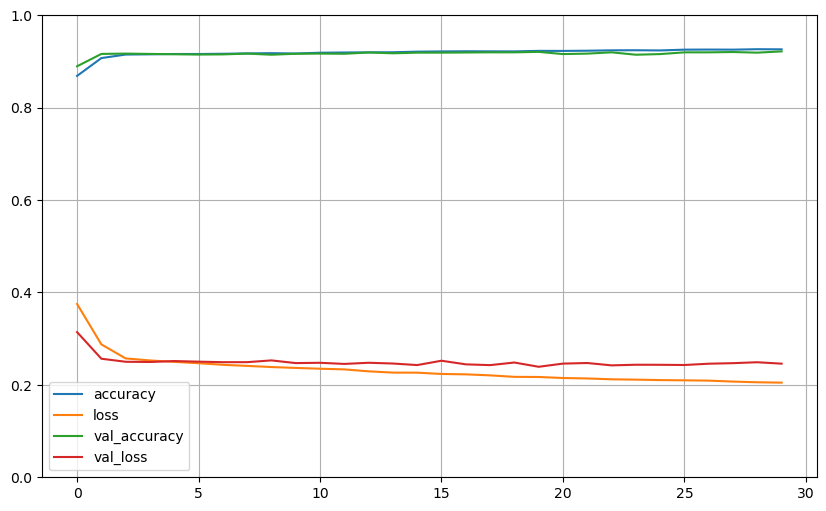

In [377]:
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Generating the .h5 model

In [378]:
# Save the model
tf_model.save('my_model.h5')

# Load the model
#loaded_model = tf.keras.models.load_model('my_model.h5')

# Use the loaded model for predictions
#predictions = loaded_model.predict(new_data)


In [379]:
# Load the model
loaded_model = tf.keras.models.load_model("my_model.h5")

# Use the loaded model for predictions
# predictions = predict_for_submit(loaded_model)

In [380]:
y_pred = loaded_model.predict(X_val2)
y_pred = y_pred.reshape(-1)  # Flatten to (17,)

# Apply threshold
threshold = 0.5
int_y_pred = np.where(y_pred > threshold, 1, 0)

# creating dataframe ewith the objectid and predicted ACClass
y_pred_final_df = pd.DataFrame({'OBJECTID':object_id_col,'ACCLASS':int_y_pred})

# applying mapping to convert the binary classification in them to labels(reverse mapping)
acclass_mapping_rev={0:'Non-Fatal Injury', 1:'Fatal'}
y_pred_final_df['ACCLASS']=y_pred_final_df['ACCLASS'].map(acclass_mapping_rev)

# saving the outputs to csv file
output_file=f'submission_NN.csv'
y_pred_final_df.to_csv(output_file,index=False)

#printing that csv file created succesfully
print(f'submssion of file for Neural Networks is created succesfully :{output_file}')

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
submssion of file for Neural Networks is created succesfully :submission_NN.csv
